In [1]:
#Functions for distance, x, y, and z
import math
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

def distance(x):
    if x < 0:
        return 0
    else:
        return 1/x

def x(R, b, l):
    return R * math.cos(b*(math.pi/180)) * math.cos(l*(math.pi/180))

def y(R, b, l):
    return R * math.cos(b*(math.pi/180)) * math.sin(l*(math.pi/180))

def z(R, b):
    return R * math.sin(b*(math.pi/180))

def absmag(m, d):
    return (((math.log10(d) * 5)*-1)+5)+m

def badToGood(bad, everything):
    return bad/everything

#https://pages.uoregon.edu/soper/Light/luminosity.html
def luminosity(m, d):
    return 4*math.pi*math.pow(d, 2)*m

def solar_lum(l):
    return l/(3.828*math.pow(10, 26))

#σ = 5.670374419...×10−8 W⋅m−2⋅K−4
def radius(l, t):
    const = 5.67 * math.pow(10, -8)
    ans = l/(4*math.pi*const*math.pow(t, 4))
    return math.log10(math.sqrt(ans))

In [2]:
def uwe(chi2, good_obs):
    u = math.sqrt(chi2/(good_obs-5))
    return u

def ruwe(u, g, b_r):
    table = pd.read_csv("table_u0_g_col.csv")
    u0 = bilinear_interpolation(g, b_r, table.values)
    return u/u0

def bilinear_interpolation(x, y, points):
    '''Interpolate (x,y) from values associated with four points.

    The four points are a list of four triplets:  (x, y, value).
    The four points can be in any order.  They should form a rectangle.

        >>> bilinear_interpolation(12, 5.5,
        ...                        [(10, 4, 100),
        ...                         (20, 4, 200),
        ...                         (10, 6, 150),
        ...                         (20, 6, 300)])
        165.0

    '''
    # See formula at:  http://en.wikipedia.org/wiki/Bilinear_interpolation

    points = sorted(points)               # order points by x, then by y
    (x1, y1, q11), (_x1, y2, q12), (x2, _y1, q21), (_x2, _y2, q22) = points
    print(points)

    if x1 != _x1 or x2 != _x2 or y1 != _y1 or y2 != _y2:
        raise ValueError('points do not form a rectangle')
    if not x1 <= x <= x2 or not y1 <= y <= y2:
        raise ValueError('(x, y) not within the rectangle')

    return (q11 * (x2 - x) * (y2 - y) +
            q21 * (x - x1) * (y2 - y) +
            q12 * (x2 - x) * (y - y1) +
            q22 * (x - x1) * (y - y1)
           ) / ((x2 - x1) * (y2 - y1) + 0.0)

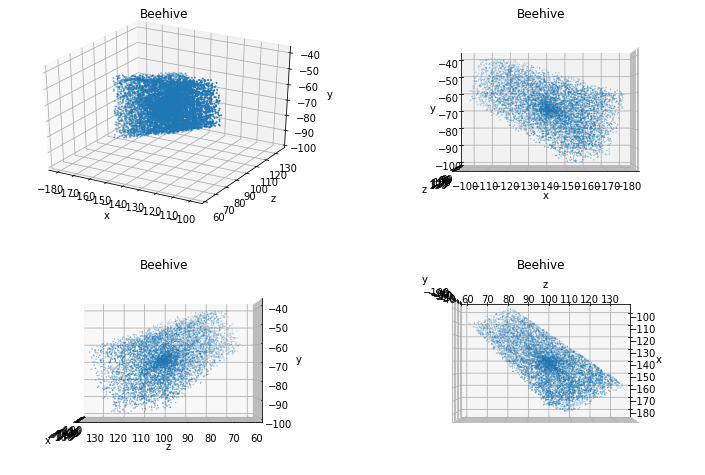

In [3]:
#SELECT * from gaiadr2.gaia_source where 
#RA between 125 and 135 AND 
#DEC between 15 and 25 AND 
#parallax > 4 AND parallax < 8

p = pd.read_csv("beehive_ra_dec.csv")
p.loc[:, 'parallax_arcsec'] = p['parallax'].apply(lambda x: x*.001)
p.loc[:, 'R'] = p['parallax_arcsec'].apply(distance)
p.loc[:, 'x'] = p.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
p.loc[:, 'y'] = p.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
p.loc[:, 'z'] = p.apply(lambda r: z(r['R'], r['b']), axis=1)


fig = plt.figure()
axp = fig.add_subplot(221, projection ='3d')
axp.scatter(p['x'], p['z'], p['y'], s=1)
#axp.set_xlim([-150, 0])
#axp.set_ylim([-80, -30])
#axp.set_zlim([10, 50])
axp.set_xlabel('x')
axp.set_ylabel('z')
axp.set_zlabel('y')
axp.set_title('Beehive')

axp1 = fig.add_subplot(222, projection ='3d')
axp1.scatter(p['x'], p['z'], p['y'], s=0.1)
#axp1.set_xlim([-150, 0])
#axp1.set_ylim([-80, -30])
#axp1.set_zlim([10, 50])
axp1.set_xlabel('x')
axp1.set_ylabel('z')
axp1.set_zlabel('y')
axp1.set_title('Beehive')
axp1.view_init(0, 90)
plt.show

axp2 = fig.add_subplot(223, projection ='3d')
axp2.scatter(p['x'], p['z'], p['y'], s=0.1)
#axp2.set_xlim([-150, 0])
#axp2.set_ylim([-80, -30])
#axp2.set_zlim([10, 50])
axp2.set_xlabel('x')
axp2.set_ylabel('z')
axp2.set_zlabel('y')
axp2.set_title('Beehive')
axp2.view_init(0, 180)
plt.show

axp3 = fig.add_subplot(224, projection ='3d')
axp3.scatter(p['x'], p['z'], p['y'], s=0.1)
#axp3.set_xlim([-150, 0])
#axp3.set_ylim([-80, -30])
#axp3.set_zlim([10, 50])
axp3.set_xlabel('x')
axp3.set_ylabel('z')
axp3.set_zlabel('y')
axp3.set_title('Beehive')
axp3.view_init(-90, 0)

plt.subplots_adjust(0.4, 0.4, 2, 2)
plt.show()

In [4]:
p.loc[:, 'magnitude'] = p.apply(lambda x: absmag(x['phot_g_mean_mag'], x['R']), axis=1)
p.loc[:, 'luminosity'] = p.apply(lambda x: luminosity(x['phot_g_mean_mag'], x['R']), axis=1)
p.loc[:, 'solar_luminosity'] = p.apply(lambda x: solar_lum(x['luminosity']), axis=1)
#pleiades.loc[:, 'temperature'] = pleiades.apply(lambda x: temp(x['solar_luminosity']), axis=1)
#pleiades.loc[:, 'approx_temp'] = pleiades.apply(lambda x: temperature(x['g_rp'], x['bp_rp']), axis=1)
p.loc[:, 'radius'] = p.apply(lambda x: radius(x['luminosity'], x['teff_val']), axis=1) #phot_g_mean_mag
#pleiades.loc[:, 'ruwe'] = pleiades.apply(lambda x: ruwe(x['astrometric_chi2_al'], x['astrometric_n_good_obs_al'], x['phot_g_mean_mag'], x['bp_rp']), axis=1)
p

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,epoch_photometry_url,parallax_arcsec,R,x,y,z,magnitude,luminosity,solar_luminosity,radius
0,1635721458409799680,Gaia DR2 684862707492668928,684862707492668928,989386364,2015.5,134.260096,0.073878,20.633312,0.046962,7.050768,...,NaN,0.007051,141.828521,-102.126006,-50.724032,84.336711,9.659712,3.897445e+06,1.018141e-20,NaN
1,1635721458409799680,Gaia DR2 684925787677267968,684925787677267968,1507062927,2015.5,133.944925,0.100025,20.792355,0.053330,6.020163,...,NaN,0.006020,166.108461,-120.274996,-58.938593,98.245551,11.021105,5.937107e+06,1.550968e-20,NaN
2,1635721458409799680,Gaia DR2 684903316409073920,684903316409073920,741943120,2015.5,134.018500,1.307064,20.646419,0.847382,4.865893,...,NaN,0.004866,205.512134,-148.519201,-73.419855,121.601024,14.037446,1.093419e+07,2.856370e-20,NaN
3,1635721458409799680,Gaia DR2 684879818643453824,684879818643453824,1375616951,2015.5,134.860256,0.031757,20.801010,0.023243,6.814540,...,NaN,0.006815,146.745045,-104.834572,-52.138898,88.461043,7.014126,3.476455e+06,9.081647e-21,-1.005644
4,1635721458409799680,Gaia DR2 684848276403620096,684848276403620096,883162239,2015.5,134.116773,0.032505,20.390393,0.019436,6.223961,...,NaN,0.006224,160.669391,-115.768343,-58.080609,95.073586,5.612089,3.776545e+06,9.865581e-21,-1.093257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6763,1635721458409799680,Gaia DR2 612247729780259712,612247729780259712,201281426,2015.5,134.549589,0.046168,17.988171,0.037556,6.096388,...,NaN,0.006096,164.031559,-115.613948,-65.696917,96.040004,6.669823,4.309096e+06,1.125678e-20,-1.004011
6764,1635721458409799680,Gaia DR2 612274079403090816,612274079403090816,1406376705,2015.5,134.576110,0.052908,18.308183,0.049181,6.555961,...,NaN,0.006556,152.532932,-107.702432,-60.313409,89.603428,0.620864,1.911441e+06,4.993315e-21,-1.721966
6765,1635721458409799680,Gaia DR2 612301983807198592,612301983807198592,123981159,2015.5,133.640953,0.192370,18.229027,0.108090,6.327273,...,NaN,0.006327,158.045966,-113.120786,-62.582959,90.915282,11.011710,5.337887e+06,1.394432e-20,-0.720350
6766,1635721458409799680,Gaia DR2 612292534878882944,612292534878882944,255173084,2015.5,134.046743,0.073262,18.207780,0.037972,6.149841,...,NaN,0.006150,162.605819,-115.662795,-64.496618,94.355479,10.358144,5.453707e+06,1.424688e-20,-0.717487


<function matplotlib.pyplot.show(*args, **kw)>

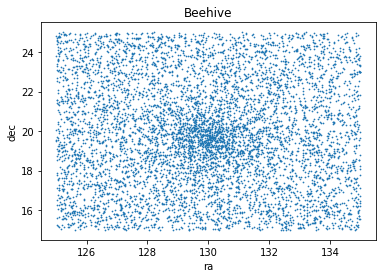

In [7]:
plt.scatter(p['ra'], p['dec'], s=.5)
plt.xlabel('ra')
plt.ylabel('dec')
plt.title('Beehive')
plt.show

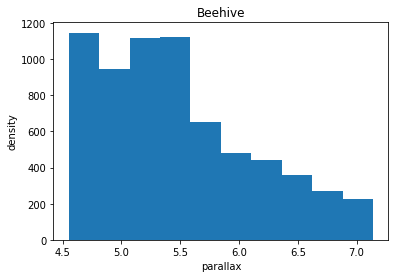

In [8]:
plt.hist(p['parallax'])
plt.xlabel('parallax')
plt.ylabel('density')
plt.title('Beehive')
plt.show()

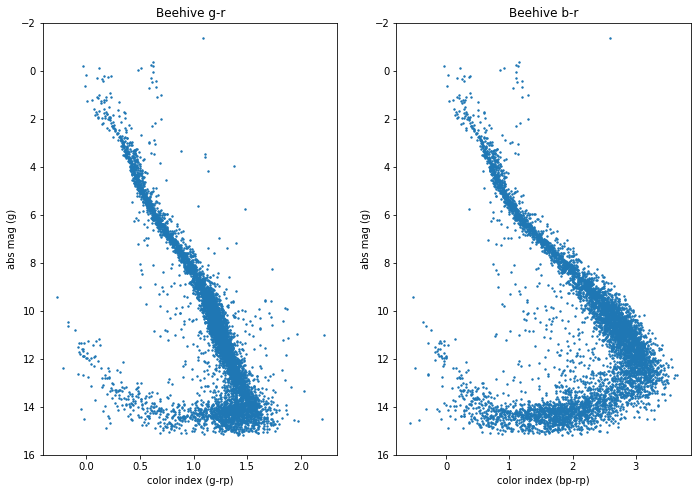

In [55]:
fig = plt.figure()
ax = fig.add_subplot(121)
ax.scatter(p['g_rp'], p['magnitude'], s=2)
ax.set_ylim(16, -2)
ax.set_title('Beehive g-r')
ax.set_xlabel("color index (g-rp)")
ax.set_ylabel("abs mag (g)")

ax2 = fig.add_subplot(122)
ax2.scatter(p['bp_rp'], p['magnitude'], s=2)
ax2.set_ylim(16, -2)
ax2.set_title('Beehive b-r')
ax2.set_xlabel("color index (bp-rp)")
ax2.set_ylabel("abs mag (g)")

plt.subplots_adjust(0.2, 0.2, 1.7, 1.7)
plt.show()

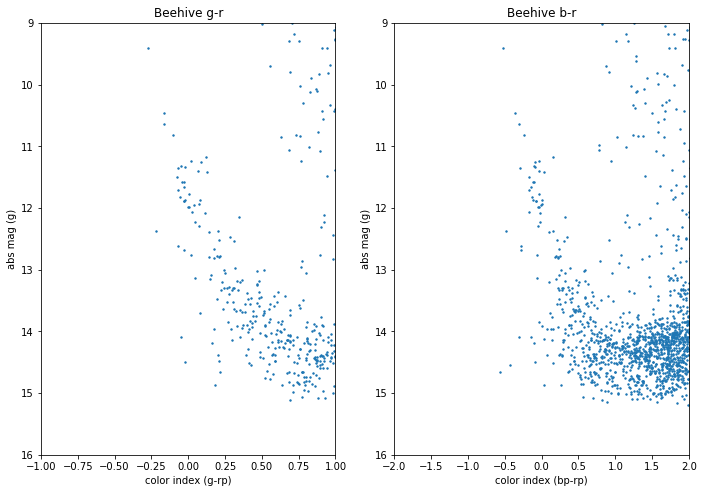

In [56]:
fig = plt.figure()
ax = fig.add_subplot(121)
ax.scatter(p['g_rp'], p['magnitude'], s=2)
ax.set_title('Beehive g-r')
ax.set_xlabel("color index (g-rp)")
ax.set_ylabel("abs mag (g)")
ax.set_xlim(-1, 1)
ax.set_ylim(16, 9)

ax2 = fig.add_subplot(122)
ax2.scatter(p['bp_rp'], p['magnitude'], s=2)
ax2.set_title('Beehive b-r')
ax2.set_xlabel("color index (bp-rp)")
ax2.set_ylabel("abs mag (g)")
ax2.set_xlim(-2, 2)
ax2.set_ylim(16, 9)

plt.subplots_adjust(0.2, 0.2, 1.7, 1.7)
plt.show()

In [57]:
count = 0
arr = []
for star in p.itertuples():
    if star.bp_rp <= 2 and star.bp_rp >= -2:
        if star.magnitude <= 16 and star.magnitude >= 9:
            arr.append([star.source_id, star.ra, star.dec, star.g_rp, star.bp_rp, star.astrometric_chi2_al, star.teff_val])
            count += 1
print(count)

data = np.array(arr)
data
df_hr_p1 = pd.DataFrame(data, columns=['source_id', 'ra', 'dec', 'g_rp', 'bp_rp', 'astrometric_chi2_al', 'teff_val'])
df_hr_p1 = df_hr_p1.round(4)
df_hr_p1.head(10)

1267


,source_id,ra,dec,g_rp,bp_rp,astrometric_chi2_al,teff_val
0,6.849033e+17,134.0185,20.6464,1.3365,1.5414,417.5993,NaN
1,6.848906e+17,134.6232,20.7883,1.4366,1.9678,353.4568,NaN
2,6.849340e+17,133.9254,21.0386,0.6068,0.6696,395.1816,NaN
3,6.848389e+17,134.4079,20.3451,0.0785,-0.0006,398.0069,NaN
4,6.848632e+17,134.2380,20.6819,1.2053,1.3010,267.8913,NaN
5,6.849937e+17,134.8411,21.0874,0.6321,0.5479,128.1713,NaN
6,6.849143e+17,134.0277,20.7996,1.4144,1.8015,1331.8177,4777.0
7,6.850035e+17,134.9526,21.2864,1.2006,1.8728,1273.9008,NaN
8,6.858137e+17,133.6073,22.0087,1.2810,1.9156,704.8580,NaN
9,6.858503e+17,134.6315,21.7910,1.2644,1.9700,351.5302,NaN


In [58]:
p.loc[:, 'uwe'] = p.apply(lambda x: uwe(x['astrometric_chi2_al'], x['astrometric_n_good_obs_al']), axis=1)
#pleiades.loc[:, 'ruwe'] = pleiades.apply(lambda x: ruwe(x['uwe'], x['phot_g_mean_mag'], x['bp_rp']), axis=1)


In [59]:
p = p[['source_id', 'ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmdec', 'astrometric_n_bad_obs_al', 
              'astrometric_n_obs_al', 'astrometric_chi2_al', 'astrometric_excess_noise', 'duplicated_source', 'phot_g_mean_mag', 
              'visibility_periods_used', 'g_rp', 'bp_rp', 'b', 'l', 'R', 'x', 'y', 'z', 'magnitude', 'luminosity', 'solar_luminosity', 'teff_val', 'radius', 'uwe']]
p

,source_id,ra,dec,parallax,parallax_error,pmra,pmdec,astrometric_n_bad_obs_al,astrometric_n_obs_al,astrometric_chi2_al,...,R,x,y,z,magnitude,luminosity,solar_luminosity,teff_val,radius,uwe
0,684862707492668928,134.260096,20.633312,7.050768,0.097328,-17.287610,-9.644467,5,384,813.13995,...,141.828521,-102.126006,-50.724032,84.336711,9.659712,3.897445e+06,1.018141e-20,NaN,NaN,1.474507
1,684925787677267968,133.944925,20.792355,6.020163,0.126328,-24.833967,-0.386304,4,450,687.13696,...,166.108461,-120.274996,-58.938593,98.245551,11.021105,5.937107e+06,1.550968e-20,NaN,NaN,1.248252
2,684903316409073920,134.018500,20.646419,4.865893,1.297895,-7.642586,-8.150300,4,371,417.59927,...,205.512134,-148.519201,-73.419855,121.601024,14.037446,1.093419e+07,2.856370e-20,NaN,NaN,1.074053
3,684879818643453824,134.860256,20.801010,6.814540,0.039886,-33.654785,-14.382760,2,212,249.52817,...,146.745045,-104.834572,-52.138898,88.461043,7.014126,3.476455e+06,9.081647e-21,4730.5100,-1.005644,1.103273
4,684848276403620096,134.116773,20.390393,6.223961,0.041000,-32.160909,-41.359351,26,442,1025.85010,...,160.669391,-115.768343,-58.080609,95.073586,5.612089,3.776545e+06,9.865581e-21,5342.0000,-1.093257,1.579869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6763,612247729780259712,134.549589,17.988171,6.096388,0.052260,-14.196340,-67.457656,4,190,255.21997,...,164.031559,-115.613948,-65.696917,96.040004,6.669823,4.309096e+06,1.125678e-20,4982.0000,-1.004011,1.187457
6764,612274079403090816,134.576110,18.308183,6.555961,0.054245,-23.410940,-21.376781,5,188,644.47815,...,152.532932,-107.702432,-60.313409,89.603428,0.620864,1.911441e+06,4.993315e-21,9292.3330,-1.721966,1.902804
6765,612301983807198592,133.640953,18.229027,6.327273,0.222186,-12.320729,25.165364,2,426,2882.17000,...,158.045966,-113.120786,-62.582959,90.915282,11.011710,5.337887e+06,1.394432e-20,3791.5700,-0.720350,2.622725
6766,612292534878882944,134.046743,18.207780,6.149841,0.086730,-39.642142,-14.268286,3,396,625.24713,...,162.605819,-115.662795,-64.496618,94.355479,10.358144,5.453707e+06,1.424688e-20,3799.4265,-0.717487,1.269434


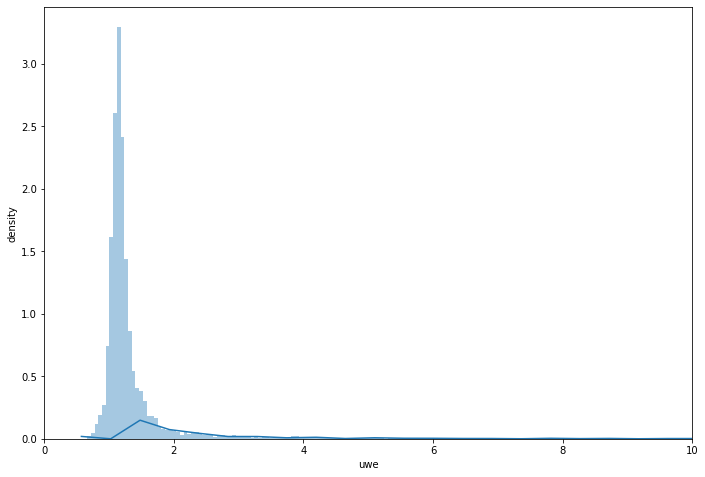

In [60]:
import seaborn as sns
sns.distplot(p['uwe'], hist=True, bins=1000)
plt.ylabel('density')
plt.xlim(0,10)
plt.subplots_adjust(0.2, 0.2, 1.7, 1.7)
plt.show()

In [61]:
#Trim data

#parallax error
s = 1/10
for index, row in p.iterrows():
    if row['parallax_error']/row['parallax'] >= s:
        p = p.drop([index])

#duplicate source
for index, row in p.iterrows():
    if row['duplicated_source'] == True:
        p = p.drop([index])

#astronometric excess noise
s = 1
for index, row in p.iterrows():
    if row['astrometric_excess_noise'] >= s:
        #print(row['astrometric_excess_noise'])
        p = p.drop([index])

#visibility periods used
s = 5
for index, row in p.iterrows():
    if row['visibility_periods_used'] <= s:
        p = p.drop([index])

p

,source_id,ra,dec,parallax,parallax_error,pmra,pmdec,astrometric_n_bad_obs_al,astrometric_n_obs_al,astrometric_chi2_al,...,R,x,y,z,magnitude,luminosity,solar_luminosity,teff_val,radius,uwe
0,684862707492668928,134.260096,20.633312,7.050768,0.097328,-17.287610,-9.644467,5,384,813.13995,...,141.828521,-102.126006,-50.724032,84.336711,9.659712,3.897445e+06,1.018141e-20,NaN,NaN,1.474507
3,684879818643453824,134.860256,20.801010,6.814540,0.039886,-33.654785,-14.382760,2,212,249.52817,...,146.745045,-104.834572,-52.138898,88.461043,7.014126,3.476455e+06,9.081647e-21,4730.5100,-1.005644,1.103273
4,684848276403620096,134.116773,20.390393,6.223961,0.041000,-32.160909,-41.359351,26,442,1025.85010,...,160.669391,-115.768343,-58.080609,95.073586,5.612089,3.776545e+06,9.865581e-21,5342.0000,-1.093257,1.579869
5,684991006756910976,134.916738,21.099699,5.773505,0.098494,-65.969821,-9.377384,3,226,465.88693,...,173.205023,-123.853781,-60.701743,104.764112,10.347935,6.235707e+06,1.628973e-20,3930.7800,-0.717911,1.461881
6,684857721036126208,134.378509,20.569022,4.726737,0.239985,-45.243854,-30.563390,1,372,436.97937,...,211.562436,-152.014743,-75.902796,126.051370,11.100529,9.971028e+06,2.604762e-20,NaN,NaN,1.092672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6762,612294660886528896,134.137091,18.276884,5.253124,0.101418,-30.080523,-4.868225,2,403,553.09973,...,190.362923,-135.285302,-75.308684,110.745346,10.443612,7.669304e+06,2.003476e-20,3413.0000,-0.550291,1.181828
6763,612247729780259712,134.549589,17.988171,6.096388,0.052260,-14.196340,-67.457656,4,190,255.21997,...,164.031559,-115.613948,-65.696917,96.040004,6.669823,4.309096e+06,1.125678e-20,4982.0000,-1.004011,1.187457
6764,612274079403090816,134.576110,18.308183,6.555961,0.054245,-23.410940,-21.376781,5,188,644.47815,...,152.532932,-107.702432,-60.313409,89.603428,0.620864,1.911441e+06,4.993315e-21,9292.3330,-1.721966,1.902804
6766,612292534878882944,134.046743,18.207780,6.149841,0.086730,-39.642142,-14.268286,3,396,625.24713,...,162.605819,-115.662795,-64.496618,94.355479,10.358144,5.453707e+06,1.424688e-20,3799.4265,-0.717487,1.269434


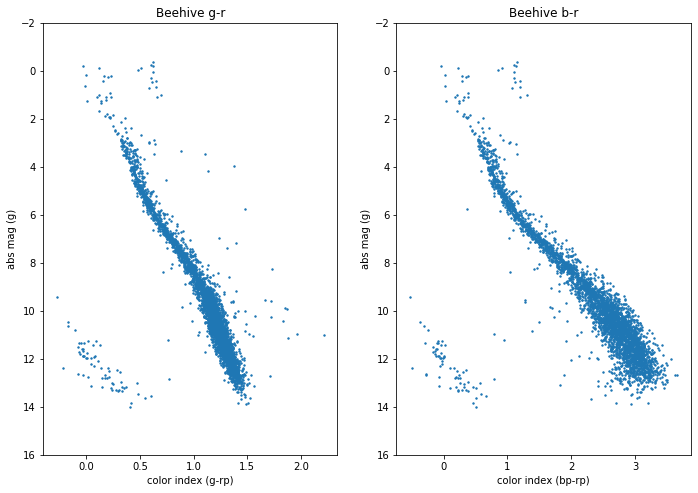

In [62]:
fig = plt.figure()
ax = fig.add_subplot(121)
ax.scatter(p['g_rp'], p['magnitude'], s=2)
ax.set_ylim(16, -2)
ax.set_title('Beehive g-r')
ax.set_xlabel("color index (g-rp)")
ax.set_ylabel("abs mag (g)")

ax2 = fig.add_subplot(122)
ax2.scatter(p['bp_rp'], p['magnitude'], s=2)
ax2.set_ylim(16, -2)
ax2.set_title('Beehive b-r')
ax2.set_xlabel("color index (bp-rp)")
ax2.set_ylabel("abs mag (g)")

plt.subplots_adjust(0.2, 0.2, 1.7, 1.7)
plt.show()

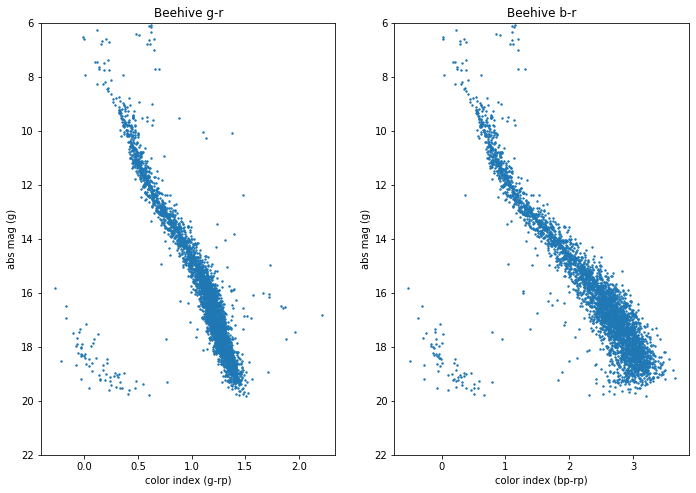

In [63]:
fig = plt.figure()
ax = fig.add_subplot(121)
ax.scatter(p['g_rp'], p['phot_g_mean_mag'], s=2)
ax.set_ylim(22, 6)
ax.set_title('Beehive g-r')
ax.set_xlabel("color index (g-rp)")
ax.set_ylabel("abs mag (g)")

ax2 = fig.add_subplot(122)
ax2.scatter(p['bp_rp'], p['phot_g_mean_mag'], s=2)
ax2.set_ylim(22, 6)
ax2.set_title('Beehive b-r')
ax2.set_xlabel("color index (bp-rp)")
ax2.set_ylabel("abs mag (g)")

plt.subplots_adjust(0.2, 0.2, 1.7, 1.7)
plt.show()

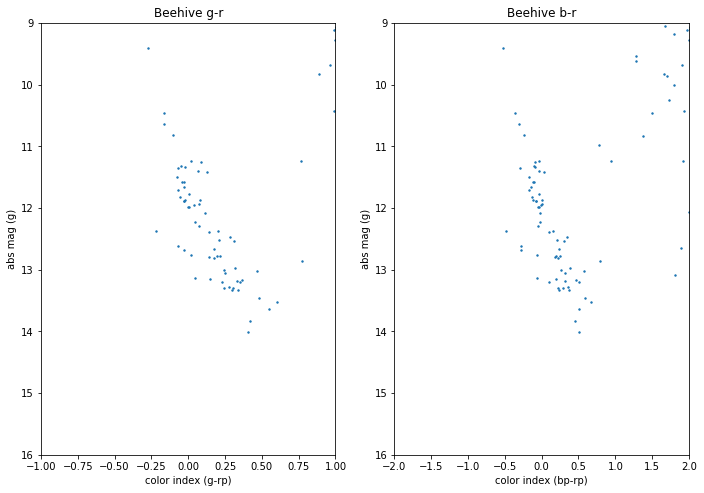

In [64]:
fig = plt.figure()
ax = fig.add_subplot(121)
ax.scatter(p['g_rp'], p['magnitude'], s=2)
ax.set_title('Beehive g-r')
ax.set_xlabel("color index (g-rp)")
ax.set_ylabel("abs mag (g)")
ax.set_xlim(-1, 1)
ax.set_ylim(16, 9)

ax2 = fig.add_subplot(122)
ax2.scatter(p['bp_rp'], p['magnitude'], s=2)
ax2.set_title('Beehive b-r')
ax2.set_xlabel("color index (bp-rp)")
ax2.set_ylabel("abs mag (g)")
ax2.set_xlim(-2, 2)
ax2.set_ylim(16, 9)

plt.subplots_adjust(0.2, 0.2, 1.7, 1.7)
plt.show()

In [65]:
count = 0
arr = []
for star in p.itertuples():
    if star.bp_rp <= 2 and star.bp_rp >= -2:
        if star.magnitude <= 16 and star.magnitude >= 9:
            arr.append([star.source_id, star.ra, star.dec, star.g_rp, star.bp_rp, star.astrometric_chi2_al, star.teff_val])
            count += 1
print(count)

data = np.array(arr)
data
df_hr_p2 = pd.DataFrame(data, columns=['source_id', 'ra', 'dec', 'g_rp', 'bp_rp', 'astrometric_chi2_al', 'teff_val'])
df_hr_p2 = df_hr_p2.round(4)
df_hr_p2.head(10)

83


,source_id,ra,dec,g_rp,bp_rp,astrometric_chi2_al,teff_val
0,6.848389e+17,134.4079,20.3451,0.0785,-0.0006,398.0069,NaN
1,6.849143e+17,134.0277,20.7996,1.4144,1.8015,1331.8177,4777.0000
2,6.856850e+17,133.9228,21.0810,0.3501,0.5025,479.5463,NaN
3,6.863596e+17,134.8215,22.8750,1.2185,1.6965,1202.8376,4546.0000
4,6.863217e+17,134.7316,22.7448,1.6662,1.2789,453.6400,5095.6333
5,6.866762e+17,134.8071,23.5282,-0.1655,-0.3131,484.6044,8868.6670
6,6.892468e+17,133.1477,23.2789,0.2272,0.1015,387.1551,NaN
7,6.891684e+17,132.4016,22.9616,0.3671,0.4655,229.1566,NaN
8,6.903269e+17,131.7422,24.2111,-0.2175,-0.4858,250.2859,NaN
9,6.905348e+17,129.6244,24.4946,0.2762,0.3517,317.7945,NaN


In [66]:
#temp
def colorTemperatureToRGB(kelvin, color):
    temp = kelvin / 100
    red = 0
    green = 0
    blue = 0
    if temp <= 66:
        red = 255
        green = temp
        green = 99.4708025861 * math.log(green) - 161.1195681661

        if temp <= 19:
            blue = 0
        else:
            blue = temp-10
            blue = 138.5177312231 * math.log(blue) - 305.0447927307

    else:
        red = temp - 60
        red = 329.698727446 * math.pow(red, -0.1332047592)
        green = temp - 60
        green = 288.1221695283 * math.pow(green, -0.0755148492 )
        blue = 255

    if color=='red':
        return clamp(red, 0, 255)
    elif color == 'green':
        return clamp(green, 0, 255)
    elif color == 'blue':
        return clamp(blue, 0, 255)
    else:
        return 0

def clamp( x, min, max ):

    if x<min:
        return min
    if x>max:
        return max

    return x

In [67]:
p.loc[:, 'red'] = p.apply(lambda x: colorTemperatureToRGB(x['teff_val'], 'red'), axis=1)
p.loc[:, 'green'] = p.apply(lambda x: colorTemperatureToRGB(x['teff_val'], 'green'), axis=1)
p.loc[:, 'blue'] = p.apply(lambda x: colorTemperatureToRGB(x['teff_val'], 'blue'), axis=1)
#p.to_csv('trythis.csv')
p.head(10)

,source_id,ra,dec,parallax,parallax_error,pmra,pmdec,astrometric_n_bad_obs_al,astrometric_n_obs_al,astrometric_chi2_al,...,z,magnitude,luminosity,solar_luminosity,teff_val,radius,uwe,red,green,blue
0,684862707492668928,134.260096,20.633312,7.050768,0.097328,-17.287610,-9.644467,5,384,813.13995,...,84.336711,9.659712,3.897445e+06,1.018141e-20,NaN,NaN,1.474507,NaN,NaN,255.000000
3,684879818643453824,134.860256,20.801010,6.814540,0.039886,-33.654785,-14.382760,2,212,249.52817,...,88.461043,7.014126,3.476455e+06,9.081647e-21,4730.5100,-1.005644,1.103273,255.0,222.501331,196.268890
4,684848276403620096,134.116773,20.390393,6.223961,0.041000,-32.160909,-41.359351,26,442,1025.85010,...,95.073586,5.612089,3.776545e+06,9.865581e-21,5342.0000,-1.093257,1.579869,255.0,234.593707,217.294513
5,684991006756910976,134.916738,21.099699,5.773505,0.098494,-65.969821,-9.377384,3,226,465.88693,...,104.764112,10.347935,6.235707e+06,1.628973e-20,3930.7800,-0.717911,1.461881,255.0,204.079822,162.847837
6,684857721036126208,134.378509,20.569022,4.726737,0.239985,-45.243854,-30.563390,1,372,436.97937,...,126.051370,11.100529,9.971028e+06,2.604762e-20,NaN,NaN,1.092672,NaN,NaN,255.000000
9,685106111880337536,134.907475,21.831650,6.166277,0.115381,-41.647094,-11.698270,3,164,259.48477,...,98.593639,10.046444,5.319743e+06,1.389693e-20,3948.6267,-0.756343,1.289715,255.0,204.530421,163.688770
10,684844290674069504,134.457207,20.450736,5.557397,0.185374,-31.612015,-63.761445,1,325,389.40237,...,107.288083,11.333814,7.164946e+06,1.871720e-20,NaN,NaN,1.104852,NaN,NaN,255.000000
11,685099652249530112,134.872070,21.754640,6.244817,0.143362,-22.146193,-24.329493,0,194,599.49660,...,97.230912,10.067825,5.184808e+06,1.354443e-20,3599.7725,-0.681580,1.780994,255.0,195.329651,146.247227
12,684877924562047616,134.753943,20.747125,4.621916,0.225318,-21.955035,-26.628188,2,198,252.20732,...,130.090480,11.348453,1.060291e+07,2.769831e-20,NaN,NaN,1.149111,NaN,NaN,255.000000
13,685060379068613248,134.593788,21.374545,6.837981,0.045081,75.612890,-20.934074,0,341,424.70523,...,88.053481,9.561156,4.135180e+06,1.080246e-20,3655.2532,-0.743984,1.124279,255.0,196.851028,149.172178


# Machine Learning

In [68]:
import math
import csv
import random
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.cluster import DBSCAN
from sklearn import metrics
import numpy as np

df = p[['pmra', 'pmdec', 'source_id']]
#b = beehive3[['pmra', 'pmdec']]
#frames = [p, b]
#df = pd.concat(frames)
X = df.to_numpy()

db = DBSCAN(eps=5, min_samples=150).fit(X) #HERE
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

data = np.asarray(labels)
label = pd.DataFrame({'labels': data})
label.head(10)

data = np.asarray(core_samples_mask)
core = pd.DataFrame({'core_samples_mask': data})

df.reset_index(drop=True, inplace=True)
label.reset_index(drop=True, inplace=True)
core.reset_index(drop=True, inplace=True)

frames = [df, core, label]
df_pm_temp = pd.concat(frames, sort=False, axis=1)

In [69]:
df = p[['pmra', 'pmdec']]
#b = beehive3[['pmra', 'pmdec']]
#frames = [p, b]
#df = pd.concat(frames)
X = df.to_numpy()

db = DBSCAN(eps=5, min_samples=150).fit(X) #HERE
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

data = np.asarray(labels)
label = pd.DataFrame({'labels': data})
label.head(10)

data = np.asarray(core_samples_mask)
core = pd.DataFrame({'core_samples_mask': data})

df.reset_index(drop=True, inplace=True)
label.reset_index(drop=True, inplace=True)
core.reset_index(drop=True, inplace=True)

frames = [df, core, label]
df_pm = pd.concat(frames, sort=False, axis=1)

In [70]:
# Number of clusters in labels, ignoring anomolies
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 2711


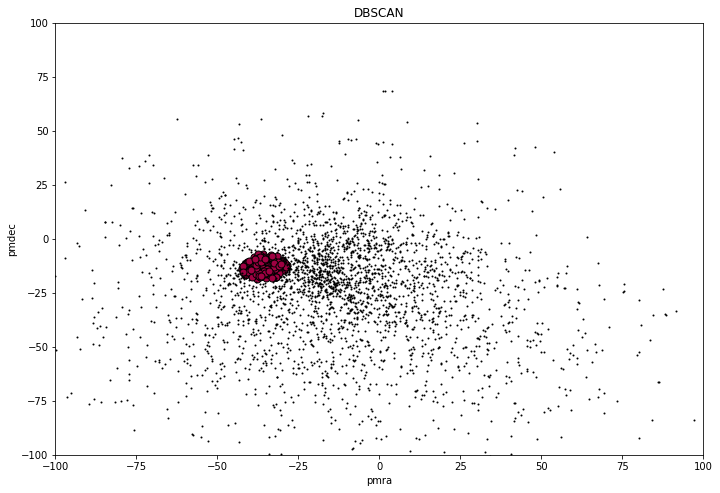

In [71]:
# Black removed and is used for noise instead.
unique_labels = set(labels) #-1, 0, 1

#gives different colors to the different clusters, and black is for anamolies
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

#for each unique label, plot it with the color that corresponds to it
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=7)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=1)

#plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.title("DBSCAN")
plt.xlabel("pmra")
plt.ylabel("pmdec")
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.subplots_adjust(.5, .5, 2, 2)
plt.show()

In [72]:
df = p[['x', 'y', 'z', 'pmra', 'pmdec']]
X = df.to_numpy()
#X.astype(np.float32)
#print(X)

db = DBSCAN(eps=5, min_samples=100).fit(X) #HERE
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

data = np.asarray(labels)
label = pd.DataFrame({'labels': data})
label.head(10)

data = np.asarray(core_samples_mask)
core = pd.DataFrame({'core_samples_mask': data})

df.reset_index(drop=True, inplace=True)
label.reset_index(drop=True, inplace=True)
core.reset_index(drop=True, inplace=True)

frames = [df, core, label]
df_multiple = pd.concat(frames, sort=False, axis=1)

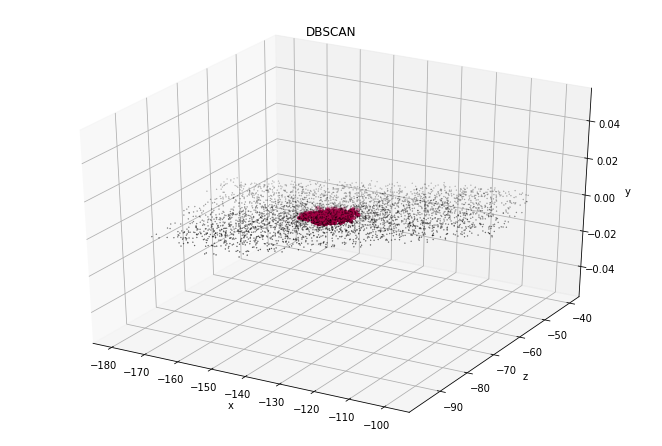

In [73]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
# Black removed and is used for noise instead.
unique_labels = set(labels) #-1, 0, 1

#gives different colors to the different clusters, and black is for anamolies
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

fig = plt.figure()
axp = fig.add_subplot(111, projection ='3d')

#for each unique label, plot it with the color that corresponds to it
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    axp.scatter(xy[:, 0], xy[:, 1], facecolor=tuple(col), s=10)

    xy = X[class_member_mask & ~core_samples_mask]
    axp.scatter(xy[:, 0], xy[:, 1], facecolor=tuple(col),
             edgecolor='k', s=0.1)

#plt.title('Estimated number of clusters: %d' % n_clusters_)

#axp.scatter(p['x'], p['z'], p['y'], s=1)
axp.set_xlabel('x')
axp.set_ylabel('z')
axp.set_zlabel('y')
#axp.set_zlim(-0.0001, 0)
#axp.set_xlim(-140, -180)
axp.set_title('DBSCAN')
plt.subplots_adjust(.5, .5, 2, 2)
plt.show()

In [74]:
anomaly = 0;
cluster = 0;

for i in labels:
    if i == 0:
        cluster += 1
    else:
        anomaly += 1
        
print("Anomaly: ", anomaly)
print("Beehive: ", cluster)

Anomaly:  3273
Beehive:  709


In [75]:
p

,source_id,ra,dec,parallax,parallax_error,pmra,pmdec,astrometric_n_bad_obs_al,astrometric_n_obs_al,astrometric_chi2_al,...,z,magnitude,luminosity,solar_luminosity,teff_val,radius,uwe,red,green,blue
0,684862707492668928,134.260096,20.633312,7.050768,0.097328,-17.287610,-9.644467,5,384,813.13995,...,84.336711,9.659712,3.897445e+06,1.018141e-20,NaN,NaN,1.474507,NaN,NaN,255.000000
3,684879818643453824,134.860256,20.801010,6.814540,0.039886,-33.654785,-14.382760,2,212,249.52817,...,88.461043,7.014126,3.476455e+06,9.081647e-21,4730.5100,-1.005644,1.103273,255.00000,222.501331,196.268890
4,684848276403620096,134.116773,20.390393,6.223961,0.041000,-32.160909,-41.359351,26,442,1025.85010,...,95.073586,5.612089,3.776545e+06,9.865581e-21,5342.0000,-1.093257,1.579869,255.00000,234.593707,217.294513
5,684991006756910976,134.916738,21.099699,5.773505,0.098494,-65.969821,-9.377384,3,226,465.88693,...,104.764112,10.347935,6.235707e+06,1.628973e-20,3930.7800,-0.717911,1.461881,255.00000,204.079822,162.847837
6,684857721036126208,134.378509,20.569022,4.726737,0.239985,-45.243854,-30.563390,1,372,436.97937,...,126.051370,11.100529,9.971028e+06,2.604762e-20,NaN,NaN,1.092672,NaN,NaN,255.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6762,612294660886528896,134.137091,18.276884,5.253124,0.101418,-30.080523,-4.868225,2,403,553.09973,...,110.745346,10.443612,7.669304e+06,2.003476e-20,3413.0000,-0.550291,1.181828,255.00000,190.029948,135.920293
6763,612247729780259712,134.549589,17.988171,6.096388,0.052260,-14.196340,-67.457656,4,190,255.21997,...,96.040004,6.669823,4.309096e+06,1.125678e-20,4982.0000,-1.004011,1.187457,255.00000,227.653759,205.305684
6764,612274079403090816,134.576110,18.308183,6.555961,0.054245,-23.410940,-21.376781,5,188,644.47815,...,89.603428,0.620864,1.911441e+06,4.993315e-21,9292.3330,-1.721966,1.902804,207.00391,221.300609,255.000000
6766,612292534878882944,134.046743,18.207780,6.149841,0.086730,-39.642142,-14.268286,3,396,625.24713,...,94.355479,10.358144,5.453707e+06,1.424688e-20,3799.4265,-0.717487,1.269434,255.00000,200.699033,156.496242


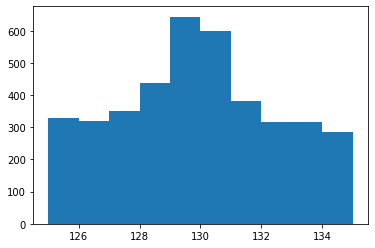

In [76]:
plt.hist(p['ra'])
plt.show()

In [77]:
df = p[['x', 'y', 'z', 'source_id']]
X = df.to_numpy()
#X.astype(np.float32)
#print(X)

db = DBSCAN(eps=5, min_samples=150).fit(X) #HERE
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

data = np.asarray(labels)
label = pd.DataFrame({'labels': data})
label.head(10)

data = np.asarray(core_samples_mask)
core = pd.DataFrame({'core_samples_mask': data})

df.reset_index(drop=True, inplace=True)
label.reset_index(drop=True, inplace=True)
core.reset_index(drop=True, inplace=True)

frames = [df, core, label]
df_original = pd.concat(frames, sort=False, axis=1)

In [78]:
df = p[['x', 'y', 'z']]
X = df.to_numpy()
#X.astype(np.float32)
#print(X)

db = DBSCAN(eps=5, min_samples=150).fit(X) #HERE
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

data = np.asarray(labels)
label = pd.DataFrame({'labels': data})
label.head(10)

data = np.asarray(core_samples_mask)
core = pd.DataFrame({'core_samples_mask': data})

df.reset_index(drop=True, inplace=True)
label.reset_index(drop=True, inplace=True)
core.reset_index(drop=True, inplace=True)

frames = [df, core, label]
df0 = pd.concat(frames, sort=False, axis=1)

In [79]:
# Number of clusters in labels, ignoring anomolies
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 3083


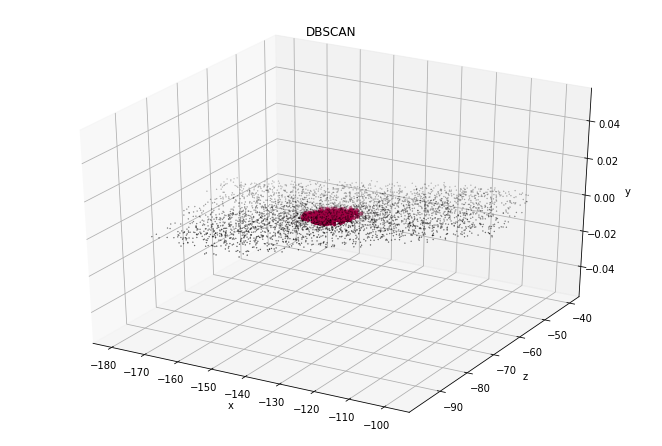

In [80]:
# Black removed and is used for noise instead.
unique_labels = set(labels) #-1, 0, 1

#gives different colors to the different clusters, and black is for anamolies
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

fig = plt.figure()
axp = fig.add_subplot(111, projection ='3d')

#for each unique label, plot it with the color that corresponds to it
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    axp.scatter(xy[:, 0], xy[:, 1], facecolor=tuple(col), s=10)

    xy = X[class_member_mask & ~core_samples_mask]
    axp.scatter(xy[:, 0], xy[:, 1], facecolor=tuple(col),
             edgecolor='k', s=0.1)

#plt.title('Estimated number of clusters: %d' % n_clusters_)

#axp.scatter(p['x'], p['z'], p['y'], s=1)
axp.set_xlabel('x')
axp.set_ylabel('z')
axp.set_zlabel('y')
#axp.set_zlim(-0.0001, 0)
#axp.set_xlim(-140, -180)
#axp.view_init(0, 180)
axp.set_title('DBSCAN')
plt.subplots_adjust(.5, .5, 2, 2)
plt.show()

In [81]:
anomaly = 0;
cluster = 0;

for i in labels:
    if i == 0:
        cluster += 1
    else:
        anomaly += 1
        
print("Anomaly: ", anomaly)
print("Beehive: ", cluster)

Anomaly:  3083
Beehive:  899


In [82]:
df_temp = df_original[['source_id']]
frames = [df_temp, df_multiple]
df_dbscan = pd.concat(frames, sort=False, axis=1)
df_dbscan.head(20)

,source_id,x,y,z,pmra,pmdec,core_samples_mask,labels
0,684862707492668928,-102.126006,-50.724032,84.336711,-17.287610,-9.644467,False,-1
1,684879818643453824,-104.834572,-52.138898,88.461043,-33.654785,-14.382760,False,-1
2,684848276403620096,-115.768343,-58.080609,95.073586,-32.160909,-41.359351,False,-1
3,684991006756910976,-123.853781,-60.701743,104.764112,-65.969821,-9.377384,False,-1
4,684857721036126208,-152.014743,-75.902796,126.051370,-45.243854,-30.563390,False,-1
5,685106111880337536,-116.473952,-54.890849,98.593639,-41.647094,-11.698270,False,-1
6,684844290674069504,-129.050476,-64.913550,107.288083,-31.612015,-63.761445,False,-1
7,685099652249530112,-115.018951,-54.399508,97.230912,-22.146193,-24.329493,False,-1
8,684877924562047616,-154.763331,-77.049548,130.090480,-21.955035,-26.628188,False,-1
9,685060379068613248,-105.244334,-50.566179,88.053481,75.612890,-20.934074,False,-1


In [83]:
correct = 0
incorrect = 0
temp = []
df_original_id = pd.Series(list(df_original['source_id']))
for star in df_dbscan.itertuples():
    if star.labels == 0:
        if star.source_id in df_original_id.unique():
            temp.append(star.source_id)
            correct += 1
        else:
            incorrect += 1
print("Beehive correctly clustered: ", correct)
print("Beehive incorrectly clustered: ", incorrect)

Beehive correctly clustered:  709
Beehive incorrectly clustered:  0


In [84]:
#SELECT * from gaiadr2.gaia_source where 
#RA between 126 and 136 AND 
#DEC between 16 and 26 AND 
#parallax > 4 AND parallax < 8
p2 = pd.read_csv("test2.csv")
p2.loc[:, 'parallax_arcsec'] = p2['parallax'].apply(lambda x: x*.001)
p2.loc[:, 'R'] = p2['parallax_arcsec'].apply(distance)
p2.loc[:, 'x'] = p2.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
p2.loc[:, 'y'] = p2.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
p2.loc[:, 'z'] = p2.apply(lambda r: z(r['R'], r['b']), axis=1)

In [85]:
df = p2[['x', 'y', 'z', 'source_id']]
X = df.to_numpy()
#X.astype(np.float32)
#print(X)

db = DBSCAN(eps=5, min_samples=150).fit(X) #HERE
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

data = np.asarray(labels)
label = pd.DataFrame({'labels': data})
label.head(10)

data = np.asarray(core_samples_mask)
core = pd.DataFrame({'core_samples_mask': data})

df.reset_index(drop=True, inplace=True)
label.reset_index(drop=True, inplace=True)
core.reset_index(drop=True, inplace=True)

frames = [df, core, label]
df_1 = pd.concat(frames, sort=False, axis=1)

In [86]:
df = p2[['x', 'y', 'z']]
X = df.to_numpy()
#X.astype(np.float32)
#print(X)

db = DBSCAN(eps=5, min_samples=150).fit(X) #HERE
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

data = np.asarray(labels)
label = pd.DataFrame({'labels': data})
label.head(10)

data = np.asarray(core_samples_mask)
core = pd.DataFrame({'core_samples_mask': data})

df.reset_index(drop=True, inplace=True)
label.reset_index(drop=True, inplace=True)
core.reset_index(drop=True, inplace=True)

frames = [df, core, label]
df1 = pd.concat(frames, sort=False, axis=1)

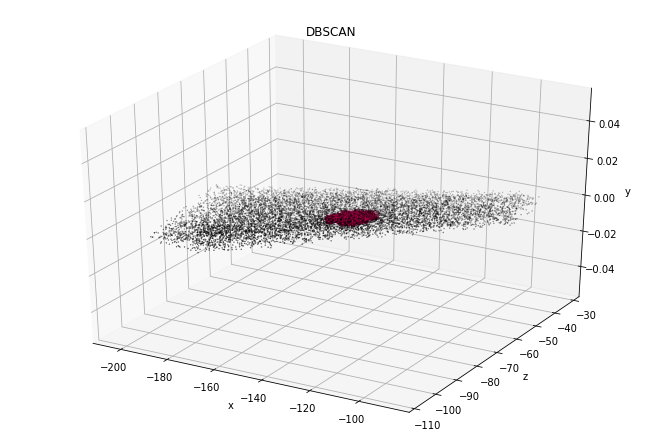

In [87]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
# Black removed and is used for noise instead.
unique_labels = set(labels) #-1, 0, 1

#gives different colors to the different clusters, and black is for anamolies
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

fig = plt.figure()
axp = fig.add_subplot(111, projection ='3d')

#for each unique label, plot it with the color that corresponds to it
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    axp.scatter(xy[:, 0], xy[:, 1], facecolor=tuple(col), s=10)

    xy = X[class_member_mask & ~core_samples_mask]
    axp.scatter(xy[:, 0], xy[:, 1], facecolor=tuple(col),
             edgecolor='k', s=0.1)

#plt.title('Estimated number of clusters: %d' % n_clusters_)

#axp.scatter(p['x'], p['z'], p['y'], s=1)
axp.set_xlabel('x')
axp.set_ylabel('z')
axp.set_zlabel('y')
#axp.set_zlim(-0.0001, 0)
#axp.set_xlim(-140, -180)
axp.set_title('DBSCAN')
plt.subplots_adjust(.5, .5, 2, 2)
plt.show()

In [88]:
anomaly = 0;
cluster = 0;

for i in labels:
    if i == 0:
        cluster += 1
    else:
        anomaly += 1
        
print("Anomaly: ", anomaly)
print("Beehive: ", cluster)

Anomaly:  8713
Beehive:  1382


In [89]:
labels

array([-1, -1, -1, ..., -1, -1, -1])

In [90]:
#df_original & df_1
df_temp = df_original[['source_id']]
frames = [df_temp, df1]
df_dbscan = pd.concat(frames, sort=False, axis=1)
df_dbscan.head(20)

,source_id,x,y,z,core_samples_mask,labels
0,6.848627e+17,-173.272971,-84.586841,147.172991,False,-1
1,6.848798e+17,-102.126006,-50.724032,84.336711,False,-1
2,6.848483e+17,-161.006038,-78.332426,131.881814,False,-1
3,6.849910e+17,-102.269933,-50.767023,87.121074,False,-1
4,6.848577e+17,-165.136242,-82.415648,136.650215,False,-1
5,6.851061e+17,-120.274996,-58.938593,98.245551,False,-1
6,6.848443e+17,-127.558766,-61.002520,109.456713,False,-1
7,6.850997e+17,-148.519201,-73.419855,121.601024,False,-1
8,6.848779e+17,-171.813078,-81.255891,144.595719,False,-1
9,6.850604e+17,-176.612023,-87.444033,150.521461,False,-1


In [91]:
correct = 0
incorrect = 0
temp = []
df_1_id = pd.Series(list(df_1['source_id']))
for star in df_dbscan.itertuples():
    if star.labels == 0:
        if star.source_id in df_1_id.unique():
            temp.append(star.source_id)
            correct += 1
        else:
            incorrect += 1
print("Beehive correctly clustered: ", correct)
print("Beehive incorrectly clustered: ", incorrect)

Beehive correctly clustered:  30
Beehive incorrectly clustered:  1352


In [92]:
temp

[6.659903119589524e+17,
 6.659154764475598e+17,
 6.659080547440915e+17,
 6.66005224085467e+17,
 6.661278883511631e+17,
 6.101920166972082e+17,
 6.101138182285513e+17,
 6.099333608829121e+17,
 6.101084194539633e+17,
 6.10093992659561e+17,
 6.101854883468449e+17,
 6.101583785136837e+17,
 6.10657629807512e+17,
 6.114166707883473e+17,
 6.11428765416228e+17,
 6.114947318174266e+17,
 6.113929926325368e+17,
 6.116039614263419e+17,
 6.115943063394555e+17,
 6.115913556978144e+17,
 6.116161591335218e+17,
 6.114166707873024e+17,
 6.114529203122116e+17,
 6.116657101718874e+17,
 6.118839932942651e+17,
 6.116837833942287e+17,
 6.116212486702726e+17,
 6.117690986243666e+17,
 6.118936140205773e+17,
 6.122574192264511e+17]

In [93]:
pd.Series(list(df_1['source_id']))

0        684999321813588480
1        684862707492668928
2        684929601608251136
3        684972589937193472
4        684856896402090752
                ...        
10090    612301983807198592
10091    612292534878882944
10092    612346887692044544
10093    612381213068610944
10094    612468658601702272
Length: 10095, dtype: int64

In [94]:
#SELECT * from gaiadr2.gaia_source where 
#RA between 130 and 140 AND 
#DEC between 20 and 30 AND 
#parallax > 4 AND parallax < 8

p3 = pd.read_csv("test.csv")
p3.loc[:, 'parallax_arcsec'] = p3['parallax'].apply(lambda x: x*.001)
p3.loc[:, 'R'] = p3['parallax_arcsec'].apply(distance)
p3.loc[:, 'x'] = p3.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
p3.loc[:, 'y'] = p3.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
p3.loc[:, 'z'] = p3.apply(lambda r: z(r['R'], r['b']), axis=1)

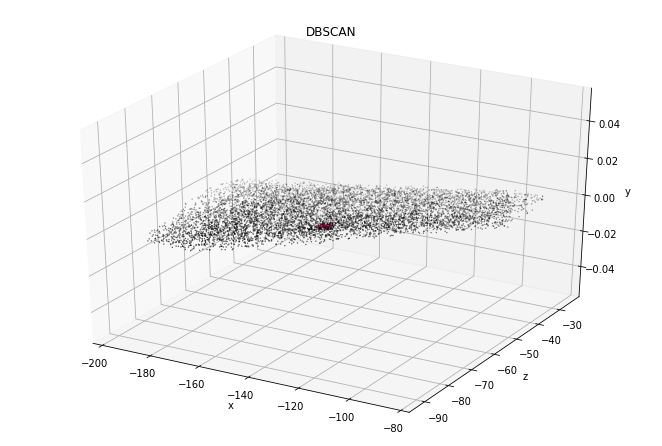

In [95]:
df = p3[['x', 'y', 'z']]
X = df.to_numpy()
#X.astype(np.float32)
#print(X)

db = DBSCAN(eps=5, min_samples=100).fit(X) #HERE
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

data = np.asarray(labels)
label = pd.DataFrame({'labels': data})
label.head(10)

data = np.asarray(core_samples_mask)
core = pd.DataFrame({'core_samples_mask': data})

df.reset_index(drop=True, inplace=True)
label.reset_index(drop=True, inplace=True)
core.reset_index(drop=True, inplace=True)

frames = [df, core, label]
df2 = pd.concat(frames, sort=False, axis=1)

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
# Black removed and is used for noise instead.
unique_labels = set(labels) #-1, 0, 1

#gives different colors to the different clusters, and black is for anamolies
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

fig = plt.figure()
axp = fig.add_subplot(111, projection ='3d')

#for each unique label, plot it with the color that corresponds to it
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    axp.scatter(xy[:, 0], xy[:, 1], facecolor=tuple(col), s=10)

    xy = X[class_member_mask & ~core_samples_mask]
    axp.scatter(xy[:, 0], xy[:, 1], facecolor=tuple(col),
             edgecolor='k', s=0.1)

#plt.title('Estimated number of clusters: %d' % n_clusters_)

#axp.scatter(p['x'], p['z'], p['y'], s=1)
axp.set_xlabel('x')
axp.set_ylabel('z')
axp.set_zlabel('y')
#axp.set_zlim(-0.0001, 0)
#axp.set_xlim(-140, -180)
axp.set_title('DBSCAN')
plt.subplots_adjust(.5, .5, 2, 2)
plt.show()

In [96]:
anomaly = 0;
cluster = 0;

for i in labels:
    if i == 0:
        cluster += 1
    else:
        anomaly += 1
        
print("Anomaly: ", anomaly)
print("Beehive: ", cluster)

Anomaly:  7449
Beehive:  166


## Find center and radius of Beehive cluster

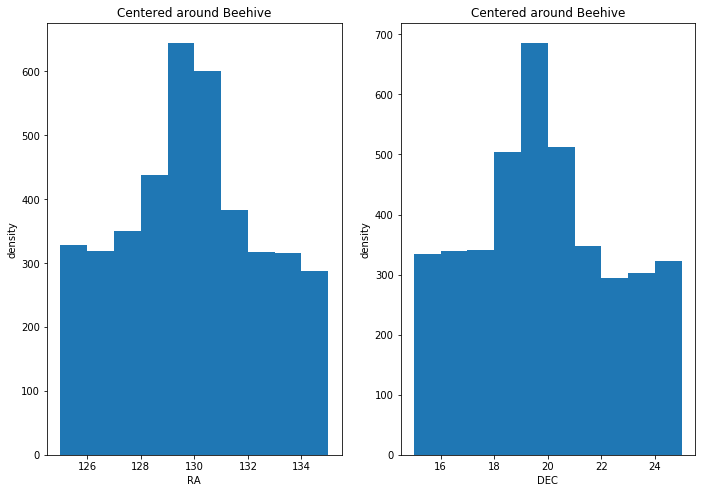

In [99]:
# Centered around beehive
fig = plt.figure()
ax = fig.add_subplot(121)
ax.hist(p['ra'])
ax.set_title('Centered around Beehive')
ax.set_xlabel("RA")
ax.set_ylabel("density")

ax2 = fig.add_subplot(122)
ax2.hist(p['dec'])
ax2.set_title('Centered around Beehive')
ax2.set_xlabel("DEC")
ax2.set_ylabel("density")

plt.subplots_adjust(0.2, 0.2, 1.7, 1.7)
plt.show()

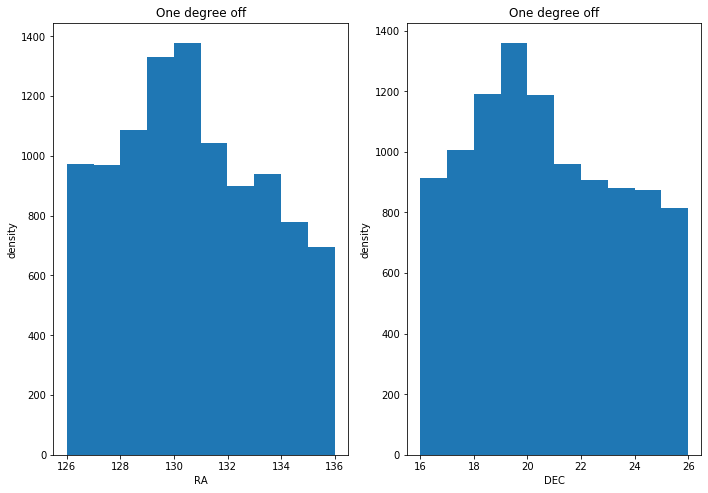

In [100]:
# One degree off
fig = plt.figure()
ax = fig.add_subplot(121)
ax.hist(p2['ra'])
ax.set_title('One degree off')
ax.set_xlabel("RA")
ax.set_ylabel("density")

ax2 = fig.add_subplot(122)
ax2.hist(p2['dec'])
ax2.set_title('One degree off')
ax2.set_xlabel("DEC")
ax2.set_ylabel("density")

plt.subplots_adjust(0.2, 0.2, 1.7, 1.7)
plt.show()

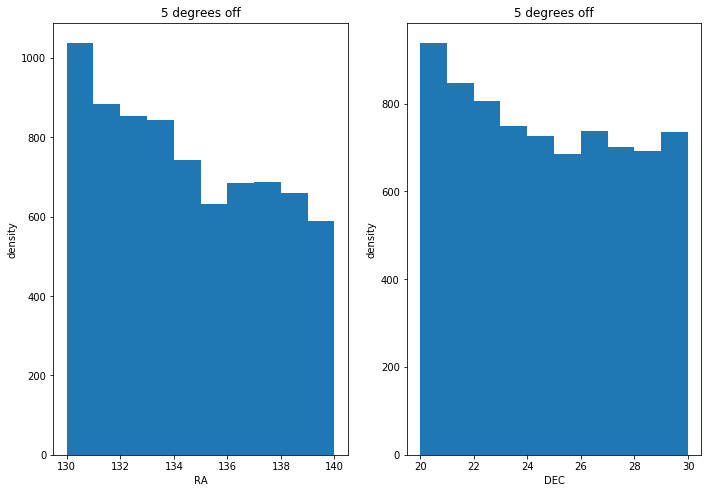

In [101]:
# 5 degrees off
fig = plt.figure()
ax = fig.add_subplot(121)
ax.hist(p3['ra'])
ax.set_title('5 degrees off')
ax.set_xlabel("RA")
ax.set_ylabel("density")

ax2 = fig.add_subplot(122)
ax2.hist(p3['dec'])
ax2.set_title('5 degrees off')
ax2.set_xlabel("DEC")
ax2.set_ylabel("density")

plt.subplots_adjust(0.2, 0.2, 1.7, 1.7)
plt.show()